# Chances of Getting Admission in an University Based on Applicant Scores

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df = df.rename(columns = {'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'University_Rating',
       'LOR ':'LOR', 'Chance of Admit ':'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df['University_Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

# Data Visualization

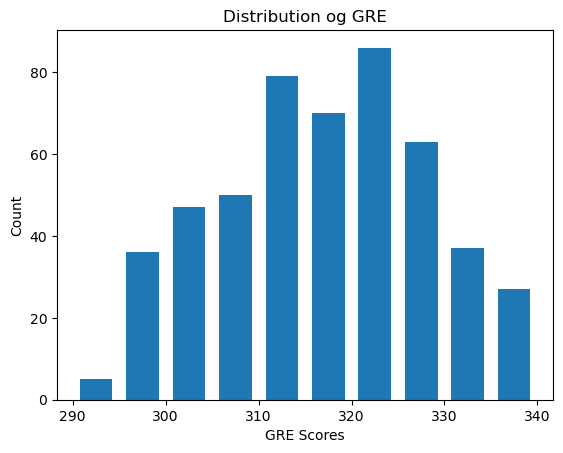

In [14]:
df['GRE'].plot(kind = 'hist',rwidth = 0.7)
plt.title('Distribution og GRE')
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

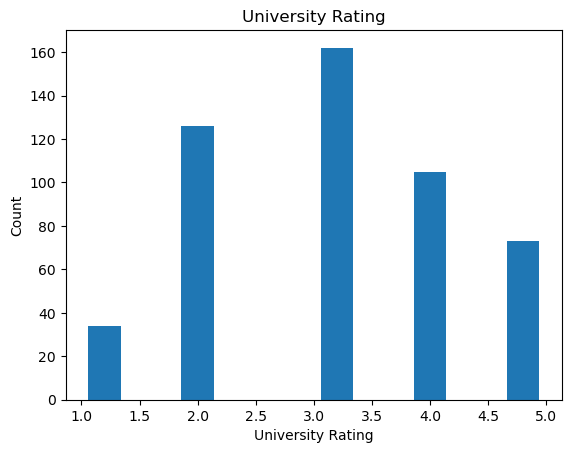

In [18]:
df['University_Rating'].plot(kind = 'hist',rwidth = 0.7)
plt.title('University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

<AxesSubplot:ylabel='Frequency'>

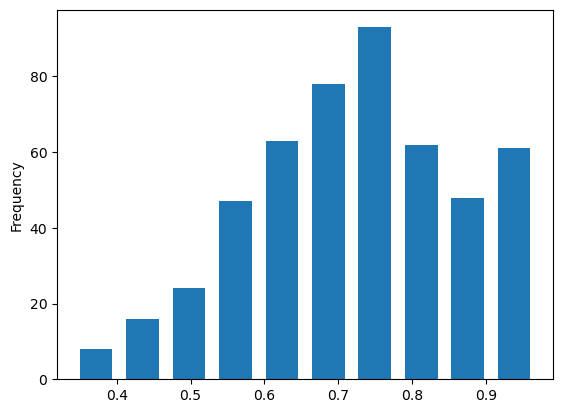

In [20]:
df['Probability'].plot(kind = 'hist',rwidth = 0.7)

In [23]:
df

,Serial No.,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


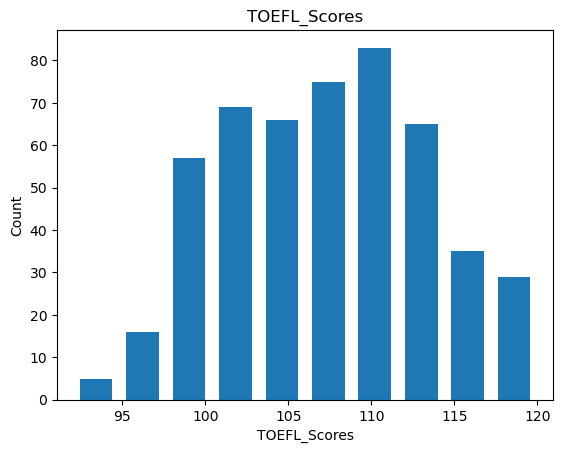

In [27]:
df['TOEFL'].plot(kind = 'hist',rwidth = 0.7)
plt.title('TOEFL_Scores')
plt.xlabel('TOEFL_Scores')
plt.ylabel('Count')
plt.show()

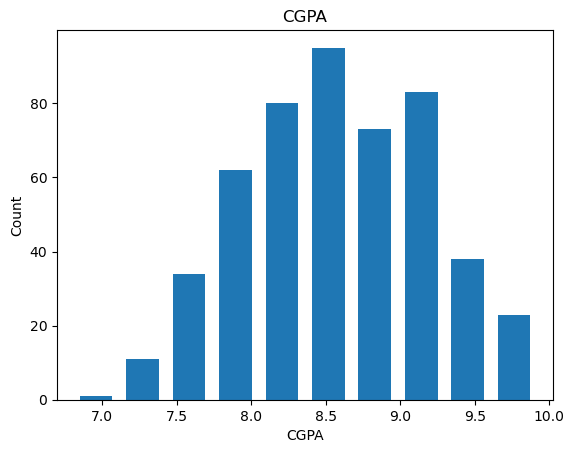

In [25]:
df['CGPA'].plot(kind = 'hist',rwidth = 0.7)
plt.title('CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

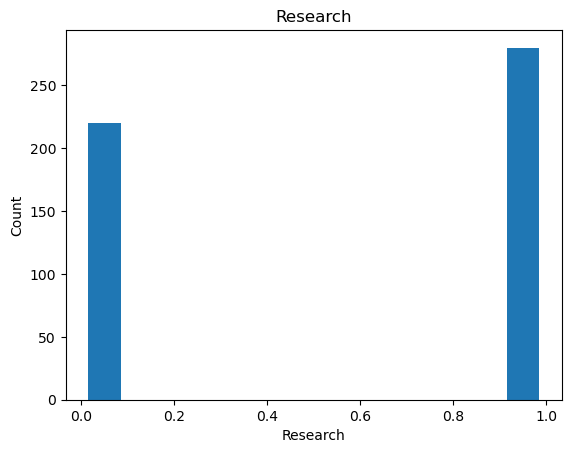

In [26]:
df['Research'].plot(kind = 'hist',rwidth = 0.7)
plt.title('Research')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

In [30]:
df.drop('Serial No.',axis = 'columns',inplace = True)
df.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
df_copy = df.copy(deep = True)
df_copy[['GRE','TOEFL','University_Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University_Rating','SOP','LOR','CGPA']].replace(0,np.NaN)
df_copy.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [50]:
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [52]:
X = df_copy.drop('Probability',axis = 'columns')
y = df_copy['Probability']

# Importing Requried Algorthims & Libraries

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Defining a Function for Best model with Best Parameters

In [73]:
def find_best_model(X,y):
    models = {
        'Linear Regression':{
            'Model' : LinearRegression(),
            'Parameters':{'normalize':[True,False]
        }
     },
        'Lasso':{
            'Model': Lasso(),
                'Parameters':{
                    'alpha':[1,2],
                    'selection':['random','cyclic']
                }
    },
        'SVR':{
            'Model':SVR(),
              'Parameters':{
                  'gamma' : ['auto','scale']
              }
    },
        'Decision Tree':{
            'Model':DecisionTreeRegressor(),
              'Parameters': {
                  'criterion' : ['mse','friedman_mse'],
                  'splitter' : ['best','random']
              }
     },
        'Random Forest':{
            'Model':RandomForestRegressor(criterion = 'mse'),
              'Parameters':{
                  'n_estimators' : [5,12,15,22]
              }
     },
        'KNeighbors':{
            'Model':KNeighborsRegressor(algorithm = 'auto'),
              'Parameters':{
                  'n_neighbors' : [2,6,12,28]
              }
        }
    }    
    
    scores = []
    for model_name , model_params in models.items():
        gs = GridSearchCV(model_params['Model'],model_params['Parameters'],cv = 5,
                         return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'Model':model_name,
            'Best_Parameters' : gs.best_params_,
            'Score':gs.best_score_
        })
    return pd.DataFrame(scores,columns = ['Model','Best_Parameters','Score'])

In [74]:
find_best_model(X,y)

,Model,Best_Parameters,Score
0,Linear Regression,{'normalize': True},0.810802
1,Lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,SVR,{'gamma': 'scale'},0.654099
3,Decision Tree,"{'criterion': 'mse', 'splitter': 'best'}",0.572013
4,Random Forest,{'n_estimators': 22},0.769342
5,KNeighbors,{'n_neighbors': 28},0.716013


In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(normalize = True),X,y,cv = 5)
print('The Highest Accuracy is : {}%'.format(round(scores.mean()*100)))

The Highest Accuracy is : 81%


In [86]:
a = sum(scores)*100

In [87]:
a/len(scores)

81.08015220863885

In [88]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)
print(len(X_train),len(X_test))

400 100


# By Obeserving the Above Data Frame , The Best Model is Linear Regressor!

In [93]:
Model = LinearRegression(normalize = True)
Model.fit(X_train,y_train)
Model.score(X_test,y_test)

0.8214787365889655

In [113]:
print('Chances of getting into UCLA is {}%'.format(round(Model.predict([[310,
                                           215,6,4.2,2.5,6.225,1]])[0]*100,3)))

Chances of getting into UCLA is 71.561%


In [112]:
Model.predict([[310,215,6,4.2,2.5,6.225,1]])[0]*100

71.56141082926695

In [114]:
import joblib
joblib.dump(Model,'Admission_Prediction_Model.pkl')

['Admission_Prediction_Model.pkl']

In [115]:
Model = joblib.load('Admission_Prediction_Model.pkl')

LinearRegression(normalize=True)

In [125]:
print(round(Model.predict([[962,2,2,2,2,2,2]])[0]*100,3),'%')

76.346 %
